# Process and visualize the wind data

This notebook calculates and visualizes the average wind speed for the advection term in the PINN. The data comes from the [ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels-monthly-means?tab=overview) reanalysis product, which provides monthly values for global wind speed. The average is taken over the period 2011-2020, integrated from 1000 to 200 hPa, and the zonal mean is taken for each latitude.

## Preliminaries

Import the necessary libraries and specify the data folders.

In [1]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
FIGURE_PATH = "../Figures/"
DATA_PATH = "../Data/"
DATA_LOAD_PATH = DATA_PATH + "original_data/"
DATA_SAVE_PATH = DATA_PATH + "processed_data/"

Load the dataset, which has two columns. Column one is the wind speed in m/s, and column two is latitude in degrees north.

In [4]:
path_wind = DATA_LOAD_PATH + "totalWindSpeed_ERA5_2011_2020_trop_lat.mat"
wind = loadmat(path_wind)
mdata = wind['totalWindSpeed_ERA5_2011_2020_trop_lat']

df = pd.DataFrame(mdata, columns = ['wind', 'latitude'])
df.sort_values(by ='latitude', ascending=True, inplace = True )

## Process and visualize the wind data

The following functions provide the processing and visualization functionality for the wind data.

In [5]:
params = {'axes.labelsize': 20,
          'axes.titlesize': 30,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'lines.linewidth': 20,
          'legend.fontsize': 20,
          'font.family':'DeJavu Serif',
          'font.serif':'Times New Roman'}

plt.rcParams.update(params)

def plot(df, url_save=FIGURE_PATH):
    # Create figure
    plt.figure(figsize=(10, 6), tight_layout=True)

    # Line plot
    plt.plot(df.wind.values, df.latitude.values, linewidth=2.5, color='#707070')

    # Quiver plot
    y = np.arange(-90, 91, 5)
    x = np.zeros_like(y)
    u = df['wind'][df.latitude.isin(y)].values
    plt.quiver(x, y, u, x, color='#0070C0', scale=1.01, scale_units='xy',
               width=0.0025, headwidth=5, headlength=8, headaxislength=6)

    y_ticks = np.arange(-90, 91, 30)
    plt.yticks(y_ticks, rotation=0)
    plt.xticks(np.arange(-20, 21, 5))
    plt.axvline(x=0.0, color='#B00020', linestyle='--', linewidth=1)
    plt.xlabel(r'Average velocity $\left(\frac{m}{s}\right)$')
    plt.ylabel('Latitude')
    plt.xlim(-20, 20)
    plt.ylim(-90, 90)
    plt.grid(axis='y')

    # Save the plot
    plt.savefig(f"{url_save}/WIND.pdf", bbox_inches='tight', dpi=600)
    plt.show()

def change_sign(row):
    '''Change the direction of the wind in specific latitudes'''
    if 16.75 >= row.latitude >= -15.50:
        row.wind = row.wind * -1
        return row
    elif row.latitude <= -82.75:
        row.wind = row.wind * -1
        return row
    else:
        return row

The data only provides the absolute value of the wind speed in east-west direction. However, the wind flows towards the west near the equator and in the south pole. These regions were manually detected from the data so that the a negative wind speed can be assigned.

In [6]:
df = df.apply(change_sign, axis=1)

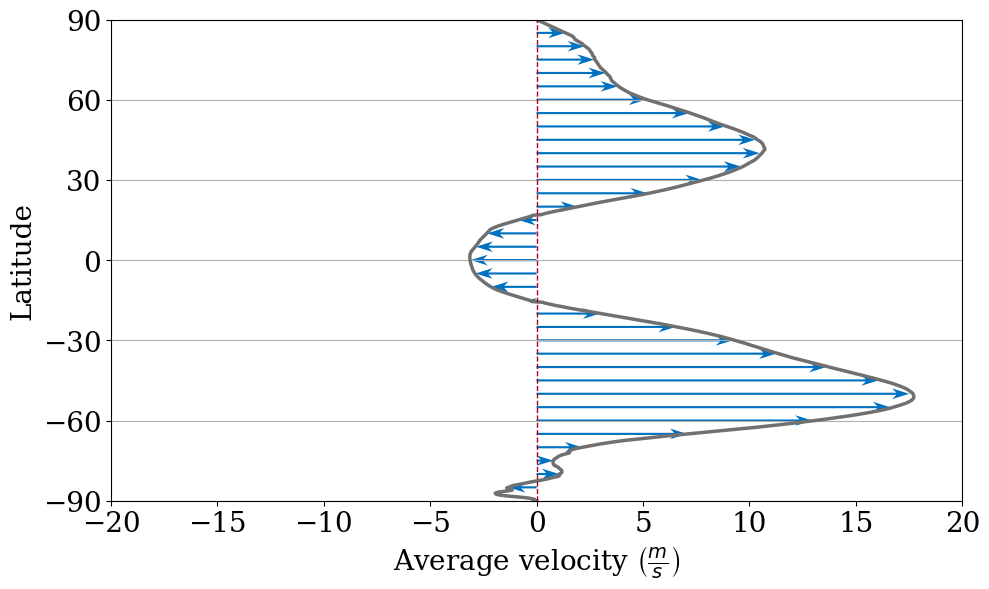

In [7]:
plot(df)

## Export the processed data

In [8]:
with open(DATA_SAVE_PATH + "df_wind.csv", 'w') as f:
    df.to_csv(f, index=False)